Référence:
-GPT-3
-Bard
-Claude

In [ ]:
!wget -O /tmp/dataset.zip https://drive.google.com/uc?id=1pJovpcK9zB9CalCBQ44afKxZfvmlJq2X
!yes | unzip /tmp/dataset.zip -d /content/dataset

--2024-01-12 18:08:28--  https://drive.google.com/uc?id=1pJovpcK9zB9CalCBQ44afKxZfvmlJq2X
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.138, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1pJovpcK9zB9CalCBQ44afKxZfvmlJq2X [following]
--2024-01-12 18:08:29--  https://drive.usercontent.google.com/download?id=1pJovpcK9zB9CalCBQ44afKxZfvmlJq2X
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4622908 (4.4M) [application/octet-stream]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip    100%[===================>]   4.41M  --.-KB/s    in 0.1s    

2024-01-12 18:08:31 (32.2 M

In [ ]:
!wget -O /tmp/dataset.zip https://drive.google.com/uc?id=1lTtSA2Z0PWX16ayVWyASzwggWl-bMiWD
!yes | unzip /tmp/dataset.zip -d /content/dataset

--2024-01-12 18:08:32--  https://drive.google.com/uc?id=1lTtSA2Z0PWX16ayVWyASzwggWl-bMiWD
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.138, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lTtSA2Z0PWX16ayVWyASzwggWl-bMiWD [following]
--2024-01-12 18:08:32--  https://drive.usercontent.google.com/download?id=1lTtSA2Z0PWX16ayVWyASzwggWl-bMiWD
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2349355 (2.2M) [application/octet-stream]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip    100%[===================>]   2.24M  --.-KB/s    in 0.05s   

2024-01-12 18:08:34 (41.0 M

In [ ]:
!pip install optuna

In [ ]:
!pip install Scikit-Optimize

##Importation des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import optuna
from hyperopt import hp, fmin, tpe, Trials
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical


##Chargement des données

In [ ]:
train = pd.read_csv("dataset/train.csv")

In [ ]:
test = pd.read_csv("dataset/test.csv")

## Aperçu des données

In [ ]:
train.head(20)

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83
5,A1,Klint De Drunk Lagos 2,A1_Klint De Drunk Lagos 2,-4.52
6,A1,Klint De Drunk Lagos 3,A1_Klint De Drunk Lagos 3,-3.73
7,A1,Klint De Drunk Warri 1,A1_Klint De Drunk Warri 1,-4.36
8,A1,AliBaba Lagos 2,A1_AliBaba Lagos 2,-4.39
9,A1,AliBaba Aso Rock 2,A1_AliBaba Aso Rock 2,4.39


In [ ]:
train.shape

(612702, 4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612702 entries, 0 to 612701
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Viewers_ID       612702 non-null  object 
 1   Joke_identifier  612702 non-null  object 
 2   Response_ID      612702 non-null  object 
 3   Rating           612702 non-null  float64
dtypes: float64(1), object(3)
memory usage: 18.7+ MB


In [ ]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes dans les données d'entraînement:")
train.isnull().sum()



Valeurs manquantes dans les données d'entraînement:


Viewers_ID         0
Joke_identifier    0
Response_ID        0
Rating             0
dtype: int64

In [ ]:

print("\nValeurs manquantes dans les données de test:")
test.isnull().sum()


Valeurs manquantes dans les données de test:


Viewers_ID         0
Joke_identifier    0
Response_ID        0
dtype: int64

In [ ]:
test.head(20)

,Viewers_ID,Joke_identifier,Response_ID
0,A1,Akpororo Lagos 1,A1_Akpororo Lagos 1
1,A1,Akpororo Abuja 1,A1_Akpororo Abuja 1
2,A1,Akpororo Abuja 5,A1_Akpororo Abuja 5
3,A1,I Go Dye Benin 1,A1_I Go Dye Benin 1
4,A1,I Go Dye Benin 3,A1_I Go Dye Benin 3
5,A1,I Go Dye Uyo 1,A1_I Go Dye Uyo 1
6,A1,I Go Dye Uyo 2,A1_I Go Dye Uyo 2
7,A1,Seyi Law Abuja 3,A1_Seyi Law Abuja 3
8,A1,Seyi Law Abuja 4,A1_Seyi Law Abuja 4
9,A1,Gordons Lagos 2,A1_Gordons Lagos 2


In [ ]:
test.shape

(435873, 3)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435873 entries, 0 to 435872
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Viewers_ID       435873 non-null  object
 1   Joke_identifier  435873 non-null  object
 2   Response_ID      435873 non-null  object
dtypes: object(3)
memory usage: 10.0+ MB


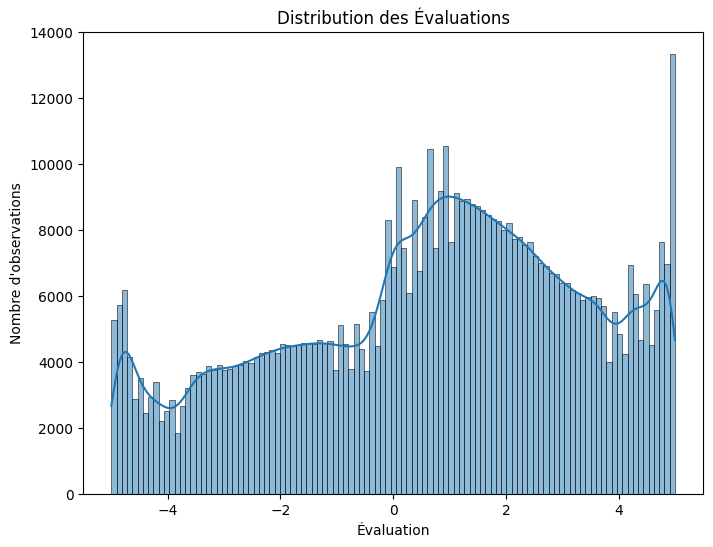

In [ ]:
# Analyse de la distribution des évaluations
plt.figure(figsize=(8, 6))
sns.histplot(train['Rating'], kde=True)
plt.title('Distribution des Évaluations')
plt.xlabel('Évaluation')
plt.ylabel('Nombre d\'observations')
plt.show()


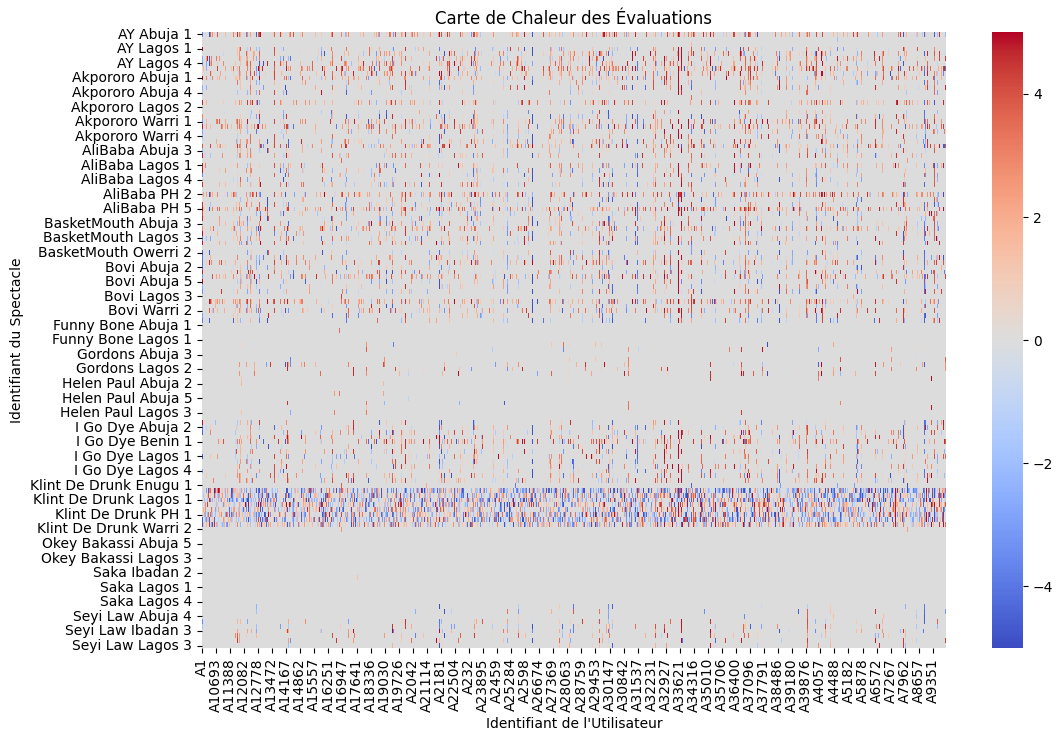

In [ ]:

import matplotlib.pyplot as plt

# Création d'un tableau croisé pour les évaluations
heatmap_data = pd.pivot_table(train, values='Rating',
                              index='Joke_identifier',
                              columns='Viewers_ID',
                              fill_value=0)

# Affichage de la carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0)
plt.title('Carte de Chaleur des Évaluations')
plt.xlabel('Identifiant de l\'Utilisateur')
plt.ylabel('Identifiant du Spectacle')
plt.show()


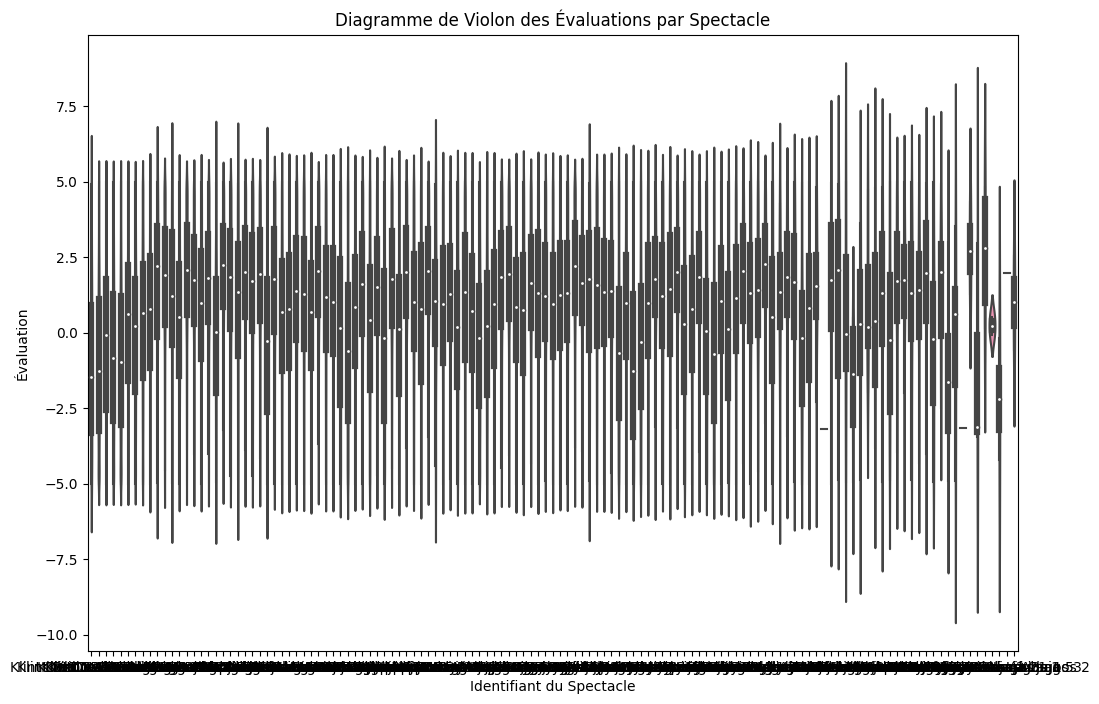

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Joke_identifier', y='Rating', data=train)
plt.title('Diagramme de Violon des Évaluations par Spectacle')
plt.xlabel('Identifiant du Spectacle')
plt.ylabel('Évaluation')
plt.show()

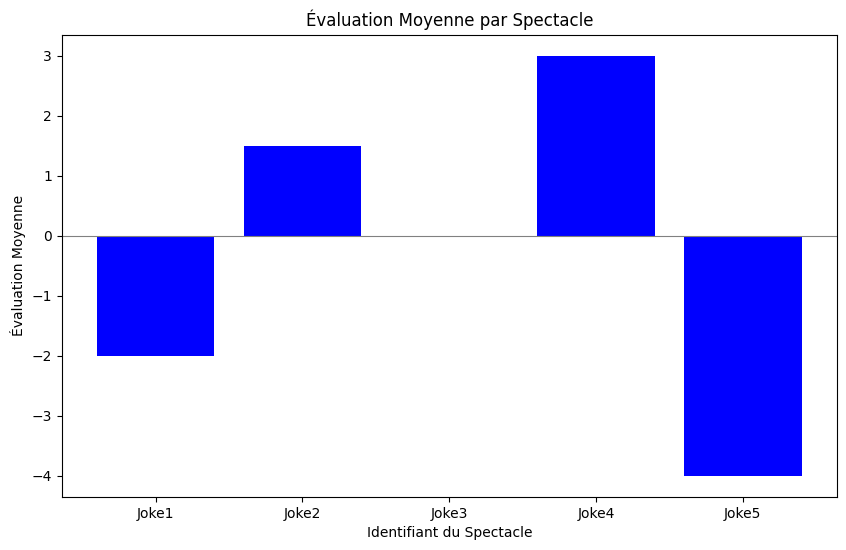

In [ ]:

# Exemple de données
data = {
    'Joke_identifier': ['Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5'],
    'Average_Rating': [-2, 1.5, 0, 3, -4]
}

df = pd.DataFrame(data)

# Création du graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(df['Joke_identifier'], df['Average_Rating'], color='blue')

# Ajout de titres et de labels
plt.title('Évaluation Moyenne par Spectacle')
plt.xlabel('Identifiant du Spectacle')
plt.ylabel('Évaluation Moyenne')
plt.axhline(0, color='grey', linewidth=0.8)

plt.show()


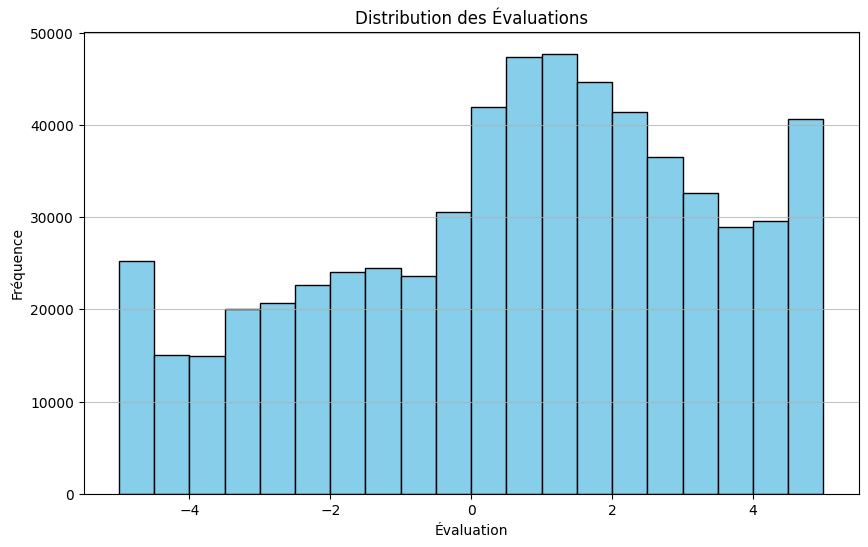

In [ ]:
import matplotlib.pyplot as plt

# Assurez-vous que train est déjà chargé comme votre dataframe
# train = ...

# Créer un histogramme
plt.figure(figsize=(10, 6))
plt.hist(train['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des Évaluations')
plt.xlabel('Évaluation')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()


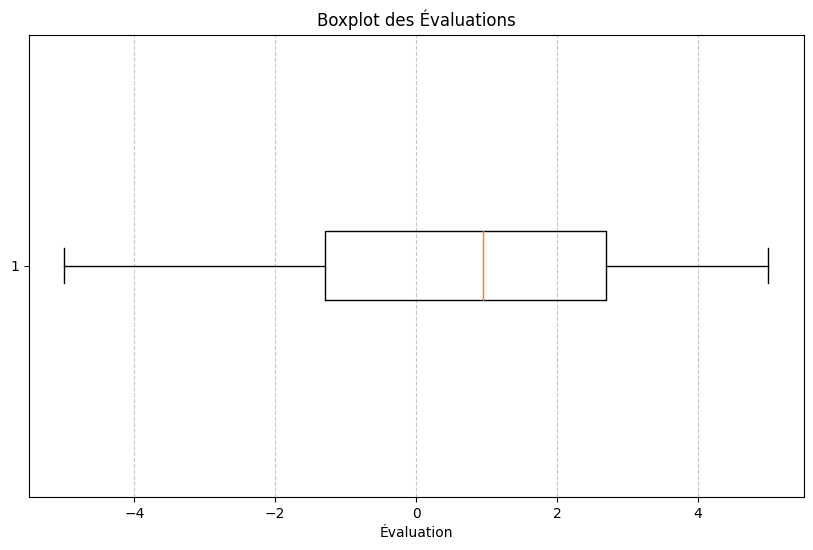

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(train['Rating'], vert=False)
plt.title('Boxplot des Évaluations')
plt.xlabel('Évaluation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Calculer les moyennes
mean_rating_per_joke = train.groupby('Joke_identifier')['Rating'].mean()
mean_rating_per_viewer = train.groupby('Viewers_ID')['Rating'].mean()

# Mapper les moyennes aux identifiants dans les jeux de données d'entraînement et de test
train['Joke_TE'] = train['Joke_identifier'].map(mean_rating_per_joke)
test['Joke_TE'] = test['Joke_identifier'].map(mean_rating_per_joke)

train['Viewer_TE'] = train['Viewers_ID'].map(mean_rating_per_viewer)
test['Viewer_TE'] = test['Viewers_ID'].map(mean_rating_per_viewer)

# S'il y a des valeurs manquantes après le mapping, vous pouvez les remplir avec la moyenne globale
global_mean = train['Rating'].mean()
train['Joke_TE'].fillna(global_mean, inplace=True)
test['Joke_TE'].fillna(global_mean, inplace=True)

train['Viewer_TE'].fillna(global_mean, inplace=True)
test['Viewer_TE'].fillna(global_mean, inplace=True)

# Division du jeu de données
X = train[['Joke_TE', 'Viewer_TE']]
y = train['Rating']

# Division du jeu de données en entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install optuna

In [ ]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
val_preds = model.predict(X_val)

# Calcul du RMSE sur l'ensemble de validation
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE: ", rmse_val)

# Prédiction sur l'ensemble de test (comme avant)
X_test = test[['Joke_TE', 'Viewer_TE']]
rating_preds = model.predict(X_test)

# Préparation du fichier de soumission
submission = pd.DataFrame({
    'Response_ID': test['Response_ID'],
    'Rating': rating_preds
})
submission.to_csv('subm1.csv', index=False)

Validation RMSE:  2.055245084210873


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import optuna

# Fonction objectif pour l'optimisation avec Optuna
def objective(trial):
    # Suggérer des valeurs pour les hyperparamètres
    alpha = trial.suggest_float('alpha', 1e-3, 10.0, log=True)

    # Création et entraînement du modèle avec les hyperparamètres proposés
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Prédiction et calcul du RMSE sur l'ensemble de validation
    val_preds = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))

    return rmse_val

# Création de l'étude Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres: ", study.best_params)

# Entraînement du modèle avec les meilleurs hyperparamètres
best_alpha = study.best_params['alpha']
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
val_preds = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE avec Optuna: ", rmse_val)

# Prédiction sur l'ensemble de test
X_test = test[['Joke_TE', 'Viewer_TE']]  # Assurez-vous que ces colonnes existent dans le dataframe 'test'
rating_preds = model.predict(X_test)

# Préparation du fichier de soumission
submission = pd.DataFrame({
    'Response_ID': test['Response_ID'],  # Assurez-vous que cette colonne existe dans le dataframe 'test'
    'Rating': rating_preds
})
submission.to_csv('subm1.csv', index=False)


[I 2024-01-12 18:10:02,706] A new study created in memory with name: no-name-ba8f366d-f805-4c3c-be77-23bd439f5e4a
[I 2024-01-12 18:10:02,772] Trial 0 finished with value: 2.055245084234469 and parameters: {'alpha': 0.004815069825725182}. Best is trial 0 with value: 2.055245084234469.
[I 2024-01-12 18:10:02,841] Trial 1 finished with value: 2.0552450848856307 and parameters: {'alpha': 0.13769024423917736}. Best is trial 0 with value: 2.055245084234469.
[I 2024-01-12 18:10:02,889] Trial 2 finished with value: 2.055245089474744 and parameters: {'alpha': 1.0739232239736385}. Best is trial 0 with value: 2.055245084234469.
[I 2024-01-12 18:10:02,912] Trial 3 finished with value: 2.0552450848334036 and parameters: {'alpha': 0.12703311479621868}. Best is trial 0 with value: 2.055245084234469.
[I 2024-01-12 18:10:02,934] Trial 4 finished with value: 2.055245084268192 and parameters: {'alpha': 0.011696765671164629}. Best is trial 0 with value: 2.055245084234469.
[I 2024-01-12 18:10:02,960] Trial

Meilleurs hyperparamètres:  {'alpha': 0.004815069825725182}
Validation RMSE avec Optuna:  2.055245084234469


In [ ]:
!pip install Scikit-Optimize

In [ ]:
!pip install hyperopt

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

In [ ]:
from sklearn.linear_model import Ridge
from hyperopt import space_eval

# Définissez l'espace de recherche pour Hyperopt
space = {
    'alpha': hp.loguniform('alpha', np.log(0.0001), np.log(100))
}

# Fonction objective pour Hyperopt
def objective(params):
    model = Ridge(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    score = mean_squared_error(y_val, preds)
    return score

# Exécutez l'optimisation
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 10)

# Récupérez les meilleurs hyperparamètres
best_params = space_eval(space, best)

# Réentrainez le modèle avec les meilleurs hyperparamètres
model_best = Ridge(**best_params)
model_best.fit(X_train, y_train)
preds_best = model_best.predict(X_val)

# Calculez le RMSE avec les meilleurs hyperparamètres
print("Best RMSE:", rmse(y_val, preds_best))


100%|██████████| 10/10 [00:00<00:00, 19.16trial/s, best loss: 4.224032356175221]
Best RMSE: 2.0552450842114234


In [ ]:

# Fonction objective pour Scikit-Optimize
def objective(params):
    model = make_pipeline(StandardScaler(), Lasso(alpha=params[0]))
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_squared_error(y_val, preds, squared=False)  # Retourne directement le RMSE



# Exemple de dimensions pour l'optimisation
dimensions = [
    Real(1e-6, 1e-1, name="learning_rate"),
    Integer(1, 100, name="n_iterations")
]

# Exécutez l'optimisation
res = gp_minimize(func=objective, dimensions=dimensions, n_calls=10, random_state=0)

# Récupérez les meilleurs hyperparamètres
best_alpha = res.x[0]
print("Meilleur alpha:", best_alpha)

# Réentrainez le modèle avec les meilleurs hyperparamètres
model_best = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha))
model_best.fit(X_train, y_train)
preds_best = model_best.predict(X_val)

# Calculez le RMSE avec les meilleurs hyperparamètres
print("Meilleur RMSE:", rmse(y_val, preds_best))

Meilleur alpha: 0.014035937690484106
Meilleur RMSE: 2.0553764961177996


##Autres méthodes de Le prétraitement des données

In [ ]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [ ]:
# Prétraitement avec Frequency Encoding
joke_freq = train['Joke_identifier'].value_counts() / len(train)
viewer_freq = train['Viewers_ID'].value_counts() / len(train)

train['Joke_freq'] = train['Joke_identifier'].map(joke_freq)
test['Joke_freq'] = test['Joke_identifier'].map(joke_freq)
train['Viewer_freq'] = train['Viewers_ID'].map(viewer_freq)
test['Viewer_freq'] = test['Viewers_ID'].map(viewer_freq)

# Remplacer les NaN par la moyenne
test['Joke_freq'].fillna(joke_freq.mean(), inplace=True)
test['Viewer_freq'].fillna(viewer_freq.mean(), inplace=True)

# Division du jeu de données, 'Response_ID': y_pred
X = train[['Joke_freq', 'Viewer_freq']]
y = train['Rating']

# Division du jeu de données en entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
val_preds = model.predict(X_val)

# Calcul du RMSE sur l'ensemble de validation
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE: ", rmse_val)

# Prédiction sur l'ensemble de test (comme avant)
X_test = test[['Joke_freq', 'Viewer_freq']]
rating_preds = model.predict(X_test)

# Préparation du fichier de soumission
submission = pd.DataFrame({
    'Response_ID': test['Response_ID'],
    'Rating': rating_preds
})
submission.to_csv('subm2.csv', index=False)

Validation RMSE:  2.607221784778802


In [ ]:
from sklearn.linear_model import Ridge
from hyperopt import space_eval

# Définissez l'espace de recherche pour Hyperopt
space = {
    'alpha': hp.loguniform('alpha', np.log(0.0001), np.log(100))
}

# Fonction objective pour Hyperopt
def objective(params):
    model = Ridge(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    score = mean_squared_error(y_val, preds)
    return score

# Exécutez l'optimisation
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 10)

# Récupérez les meilleurs hyperparamètres
best_params = space_eval(space, best)

# Réentrainez le modèle avec les meilleurs hyperparamètres
model_best = Ridge(**best_params)
model_best.fit(X_train, y_train)
preds_best = model_best.predict(X_val)

# Calculez le RMSE avec les meilleurs hyperparamètres
print("Best RMSE:", rmse(y_val, preds_best))


100%|██████████| 10/10 [00:00<00:00, 43.19trial/s, best loss: 6.79869475846501]
Best RMSE: 2.6074306814304786


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skopt.space import Real, Integer
# Fonction objective pour Scikit-Optimize
def objective(params):
    model = make_pipeline(StandardScaler(), Lasso(alpha=params[0]))
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_squared_error(y_val, preds, squared=False)  # Retourne directement le RMSE



# Exemple de dimensions pour l'optimisation
dimensions = [
    Real(1e-6, 1e-1, name="learning_rate"),
    Integer(1, 100, name="n_iterations")
]

# Exécutez l'optimisation
res = gp_minimize(func=objective, dimensions=dimensions, n_calls=10, random_state=0)

# Récupérez les meilleurs hyperparamètres
best_alpha = res.x[0]
print("Meilleur alpha:", best_alpha)

# Réentrainez le modèle avec les meilleurs hyperparamètres
model_best = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha))
model_best.fit(X_train, y_train)
preds_best = model_best.predict(X_val)

# Calculez le RMSE avec les meilleurs hyperparamètres
print("Meilleur RMSE:", rmse(y_val, preds_best))

Meilleur alpha: 0.014035937690484106
Meilleur RMSE: 2.6074525394277854
